<a href="https://colab.research.google.com/github/ChauQueBinh/20130204_ChauQueBinh_ML/blob/main/ProjectGK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_2023'
# code
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df=pd.read_csv("exams.csv")
df.head(10)

from sklearn.preprocessing import LabelEncoder

for c in df.columns:
    if df[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

df['math score'] = pd.cut(df['math score'], bins=[0, 50, 75, 100], labels=[0, 1, 2])
df['reading score'] = pd.cut(df['reading score'], bins=[0, 50, 75, 100], labels=[0, 1, 2])
df['writing score'] = pd.cut(df['writing score'], bins=[0, 50, 75, 100], labels=[0, 1, 2])
df.head(20)

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML_2023


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,1,1,2
1,1,3,0,1,1,2,2,2
2,0,3,4,0,1,1,2,2
3,1,1,4,0,1,1,1,1
4,0,3,0,1,1,2,2,2
5,1,2,5,1,1,1,1,1
6,0,4,0,1,1,2,2,2
7,0,1,5,1,1,0,1,1
8,1,2,5,1,1,2,1,1
9,0,2,1,1,0,1,1,2


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

def build_and_eval_model(clf,tager):
    # lấy dữ liệu
    df=pd.read_csv("exams.csv")
    # xử lý dữ liệu 
    for c in df.columns:
        if df[c].dtype=='object': 
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)

    df['math score'] = pd.cut(df['math score'], bins=[0, 50, 75, 100], labels=[0, 1, 2])
    df['reading score'] = pd.cut(df['reading score'], bins=[0, 50, 75, 100], labels=[0, 1, 2])
    df['writing score'] = pd.cut(df['writing score'], bins=[0, 50, 75, 100], labels=[0, 1, 2])
    # Tách dữ liệu thành biến input X và output y
    # target colums tager 
    target_col = tager
    X = df.drop([target_col], axis=1)
    y = df[target_col]

    # Phân chia dữ liệu, bảo tồn tỷ lệ phân lớp (stratify=y).
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Khởi tạo mô hình
    model = clf

    # Đánh giá mô hình bằng Kiểm chứng chéo trên Training Set
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores).iloc[:, 2:]
    print('A. Cross Validation on Training Set')
    print(cv_scores.describe())

    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dùng mô hình dự đoán trên Test Set
    y_pred = model.predict(X_test)

    # Đánh giá kết quả dự đoán của mô hình trên Test Set
    final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred),],
                                 'precision': [precision_score(y_test, y_pred,average ='macro')],
                                 'recall': [recall_score(y_test, y_pred,average ='macro')],
                                 'f1': [f1_score(y_test, y_pred,average ='macro')]})
    print('B. Final Validation on Test Set')
    print(final_scores.to_string(index=False))

    # Trực quan hóa kết quả đánh giá
    fig, ax = plt.subplots(figsize=(8,6))
    final_scores.plot(kind='bar', ax=ax)

    # Đặt tiêu đề cho biểu đồ và các trục
    plt.title(clf)
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.show()
    # ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [11]:
# Neural network	
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from tensorflow import keras

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Kiểm tra có ô nào bị thiếu dữ liệu trong dataset
print(df.isnull().sum())

# Đếm số hàng trùng lặp
print(df.duplicated().sum())

# Xóa các hàng trùng lặp (có 1103 hàng)
df.drop_duplicates(inplace=True)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
415


In [14]:
# Lấy ra danh sách tên các đặc trưng định lượng và định tính
numerical = df.drop(columns=['math score']).select_dtypes(include=np.number).columns.tolist()
categorical = df.drop(columns=['math score']).select_dtypes(object).columns.tolist()

In [16]:
# Tạo các transformer cho các cột dữ liệu số và phân loại
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Kết hợp các transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical),
        ('cat', cat_transformer, categorical)
    ])
# Tạo pipeline để kết hợp các bước chuyển đổi và trích chọn đặc trưng
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(mutual_info_classif, k=5))
])

# Áp dụng pipeline cho tập dữ liệu
X = df.drop(['math score'], axis=1)
y = df['math score']

X_selected = pipe.fit_transform(X, y)

In [17]:
from matplotlib import axis
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Phân chia dữ liệu, bảo tồn tỷ lệ phân lớp (stratify=y).
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, stratify=y, random_state=0)

def build_and_eval_model(clf):
  
    # Đánh giá mô hình bằng Kiểm chứng chéo trên Training Set
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores).iloc[:, 2:]
    print('A. Cross Validation with train set')
    print(cv_scores.describe())

    # Huấn luyện mô hình
    clf.fit(X_train, y_train)

    # Dùng mô hình dự đoán trên Test Set
    y_pred = clf.predict(X_test)

    # Đánh giá kết quả dự đoán của mô hình trên Test Set
    final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred)],
                                 'precision': [precision_score(y_test, y_pred, average='macro')],
                                 'recall': [recall_score(y_test, y_pred, average='macro')],
                                 'f1': [f1_score(y_test, y_pred, average='macro')]})
    print('B. Final Validation with test set')
    print(final_scores.to_string(index=False))

    #  Hiển thị kết quả đánh giá dưới dạng biểu đồ hộp và confusion matrix
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(ax=axs[1])
    plt.show()

    # Lưu kết quả đánh giá
    cv_scores.to_csv('{}_cv_scores.csv'.format(clf.__class__.__name__), index=False)
    final_scores.to_csv('{}_final_scores.csv'.format(clf.__class__.__name__), index=False)

In [18]:
input_dim = X_selected.shape[1]
num_classes=y.nunique()
     

In [19]:
normalizer = Normalizer()

x = normalizer.fit_transform(X_selected)
y_integer = y.astype('category').cat.codes
y_categorical = keras.utils.to_categorical(y_integer, num_classes)

from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.25, stratify=y_categorical, random_state=0)

optimizer = ['Adam', 'SGD', 'RMSprop']
batch_size = [32,64,128]
epochs = [15, 30, 60]
param_grid = {"optimizer":optimizer, "batch_size":batch_size, "epochs":epochs}

#Create a python function that returns a compiled DNN model
def create_dnn_model():
  model = Sequential()
  model.add(Dense(250,input_dim=input_dim, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model
  
#Use Keras wrapper to package the model as an sklearn object
model = KerasClassifier(build_fn=create_dnn_model)

grid_model = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, refit=True)

grid_model.fit(X_train, y_train)
best_model = grid_model.best_estimator_
print(best_model)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/30
7/7 [==============================] - 1s 5ms/step - loss: 1.0563 - accuracy: 0.5091
Epoch 2/30
7/7 [==============================] - 0s 4ms/step - loss: 0.9750 - accuracy: 0.5548
Epoch 3/30
7/7 [==============================] - 0s 4ms/step - loss: 0.9362 - accuracy: 0.5822
Epoch 4/30
7/7 [==============================] - 0s 4ms/step - loss: 0.9121 - accuracy: 0.5913
Epoch 5/30
7/7 [==============================] - 0s 4ms/step - loss: 0.9037 - accuracy: 0.5913
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 0.8883 - accuracy: 0.6096
Epoch 7/30
7/7 [==============================] - 0s 4ms/step - loss: 0.8809 - accuracy: 0.6073
Epoch 8/30
7/7 [==============================] - 0s 3ms/step - loss: 0.8753 - accuracy: 0.6119
Epoch 9/30
7/7 [==============================] - 0s 3ms/step - loss: 0.8718 - accuracy: 0.5982
Epoch 10/30
7/7 [==============================] - 0s 3ms/step - loss: 0.8684 - accuracy: 0.6050
Epoch 11/30
7/7 [======================

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from tensorflow import keras
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [21]:
# Define the neural network model
model = Sequential()
model.add(Dense(250,input_dim=X_selected.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Đánh giá mô hình bằng Kiểm chứng chéo trên Training Set
# Define the cross-validation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Train and evaluate the model using cross-validation
scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in cv.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_integer_train = y_train.astype('category').cat.codes
    y_integer_test = y_test.astype('category').cat.codes

    y_train_cat = keras.utils.to_categorical(y_integer_train, num_classes=8)
    y_test_cat = keras.utils.to_categorical(y_integer_test, num_classes=8)

    model.fit(X_train, y_train_cat, epochs=60, batch_size=128, verbose=1)
    
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    score = model.evaluate(X_test, y_test_cat, verbose=0)
    scores.append(score[1])

    y_check = np.array(y_integer_test)
    report = classification_report(y_check, y_pred_classes, output_dict=True)
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])

results = pd.DataFrame({
    'test_accuracy': scores,
    'test_precision_macro': precision_scores,
    'test_recall_macro': recall_scores,
    'test_f1_macro':  f1_scores
})

print(results)

results.to_csv('{}_cv_scores.csv'.format(model.__class__.__name__), index=False)

Epoch 1/60
4/4 [==============================] - 1s 8ms/step - loss: 1.7990 - accuracy: 0.3953
Epoch 2/60
4/4 [==============================] - 0s 6ms/step - loss: 1.3268 - accuracy: 0.5705
Epoch 3/60
4/4 [==============================] - 0s 7ms/step - loss: 1.1292 - accuracy: 0.5705
Epoch 4/60
4/4 [==============================] - 0s 6ms/step - loss: 1.0370 - accuracy: 0.5748
Epoch 5/60
4/4 [==============================] - 0s 8ms/step - loss: 0.9867 - accuracy: 0.5726
Epoch 6/60
4/4 [==============================] - 0s 7ms/step - loss: 0.9554 - accuracy: 0.5684
Epoch 7/60
4/4 [==============================] - 0s 7ms/step - loss: 0.9386 - accuracy: 0.5812
Epoch 8/60
4/4 [==============================] - 0s 7ms/step - loss: 0.9262 - accuracy: 0.5769
Epoch 9/60
4/4 [==============================] - 0s 8ms/step - loss: 0.9164 - accuracy: 0.5769
Epoch 10/60
4/4 [==============================] - 0s 10ms/step - loss: 0.9132 - accuracy: 0.5833
Epoch 11/60
4/4 [=====================

Epoch 1/60
4/4 [==============================] - 1s 10ms/step - loss: 1.0697 - accuracy: 0.4749
Epoch 2/60
4/4 [==============================] - 0s 8ms/step - loss: 0.9974 - accuracy: 0.5616
Epoch 3/60
4/4 [==============================] - 0s 9ms/step - loss: 0.9624 - accuracy: 0.5662
Epoch 4/60
4/4 [==============================] - 0s 10ms/step - loss: 0.9404 - accuracy: 0.5685
Epoch 5/60
4/4 [==============================] - 0s 8ms/step - loss: 0.9245 - accuracy: 0.5731
Epoch 6/60
4/4 [==============================] - 0s 7ms/step - loss: 0.9128 - accuracy: 0.5799
Epoch 7/60
4/4 [==============================] - 0s 14ms/step - loss: 0.9077 - accuracy: 0.5708
Epoch 8/60
4/4 [==============================] - 0s 13ms/step - loss: 0.9012 - accuracy: 0.5799
Epoch 9/60
4/4 [==============================] - 0s 24ms/step - loss: 0.8954 - accuracy: 0.5822
Epoch 10/60
4/4 [==============================] - 0s 27ms/step - loss: 0.8935 - accuracy: 0.5753
Epoch 11/60
4/4 [================

ValueError: ignored

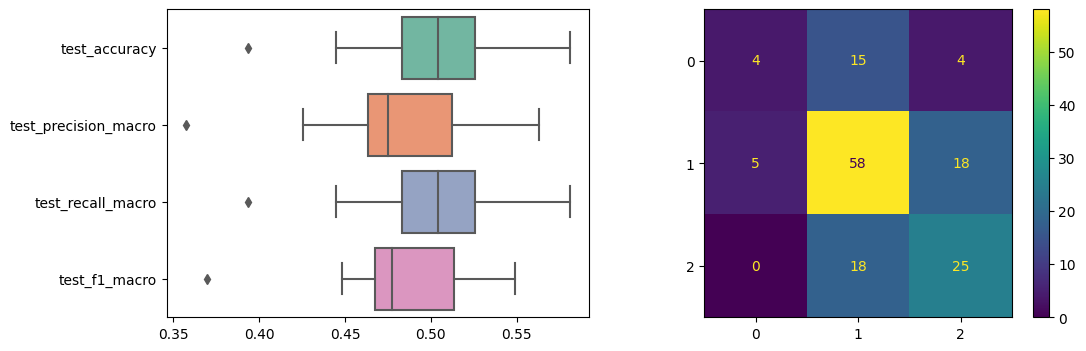

In [22]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

model = Sequential()
model.add(Dense(250,input_dim=input_dim, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

normalizer = Normalizer()

x = normalizer.fit_transform(X_selected)
y_integer = y.astype('category').cat.codes
y_categorical = keras.utils.to_categorical(y_integer, num_classes)

X_train, X_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.25, random_state=0)

model.fit(X_train, y_train, epochs=60, batch_size=128, verbose=1)

score = model.evaluate(X_test, y_test)
print(score)

y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding to integers
y_pred_int = np.argmax(y_pred, axis=1)

# Convert true labels from one-hot encoding to integers
y_test_int = np.argmax(y_test, axis=1)

#Đánh giá kết quả dự đoán của mô hình trên Test Set
final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test_int, y_pred_int)],
                                 'precision': [precision_score(y_test_int, y_pred_int, average='macro')],
                                 'recall': [recall_score(y_test_int, y_pred_int, average='macro')],
                                 'f1': [f1_score(y_test_int, y_pred_int, average='macro')]})


#  Hiển thị kết quả đánh giá dưới dạng biểu đồ hộp và confusion matrix
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=results, orient="h", palette="Set2", ax=axs[0])

# Calculate confusion matrix
display_labels = [4,6,8,12,3,10,5]
cm = confusion_matrix(y_test_int, y_pred_int)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = display_labels)
disp.plot(ax=axs[1])
plt.show()

# Lưu kết quả đánh giá
final_scores.to_csv('{}_final_scores.csv'.format(model.__class__.__name__), index=False)

BUILD AND EVALUATE SVM MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.749524              0.744441           0.679673       0.700649
std         0.028631              0.046259           0.035693       0.038491
min         0.707143              0.668333           0.625576       0.634066
25%         0.728571              0.719771           0.657168       0.676316
50%         0.742857              0.737318           0.676866       0.702120
75%         0.771429              0.792389           0.700930       0.733460
max         0.800000              0.808977           0.759208       0.769058
B. Final Validation on Test Set
 accuracy  precision   recall      f1
     0.79   0.748048 0.722388 0.73392


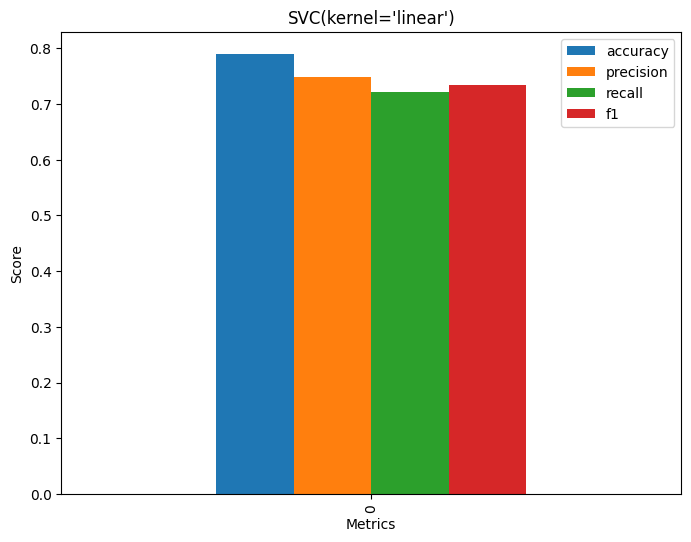

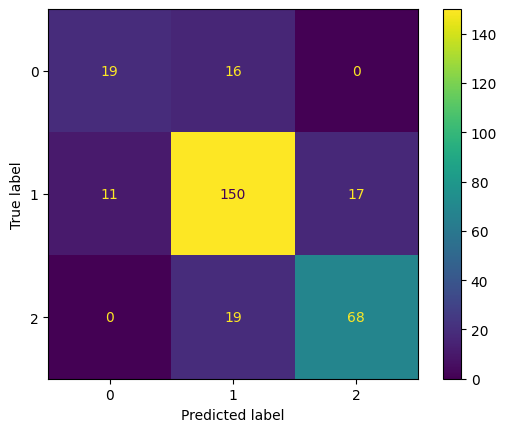

In [4]:
# SVM	
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
svc =  SVC(kernel='linear')
print('BUILD AND EVALUATE SVM MODEL')
clf = KNeighborsClassifier(n_neighbors = 5)
build_and_eval_model(svc,'math score')

BUILD AND EVALUATE knn MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.703810              0.684828           0.642265       0.655280
std         0.029925              0.037776           0.044123       0.040769
min         0.642857              0.597222           0.582178       0.600471
25%         0.685714              0.665713           0.610247       0.624322
50%         0.700000              0.683932           0.631172       0.647806
75%         0.728571              0.701831           0.666760       0.682020
max         0.764286              0.752414           0.750960       0.744462
B. Final Validation on Test Set
 accuracy  precision  recall       f1
 0.713333   0.652408 0.66383 0.657796


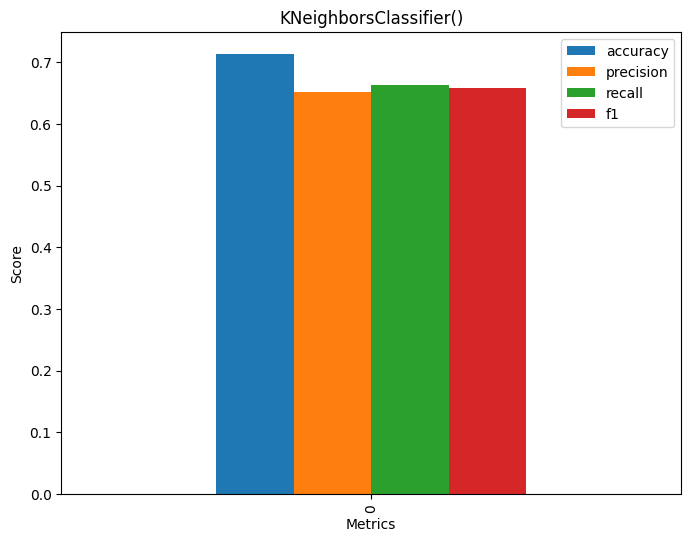

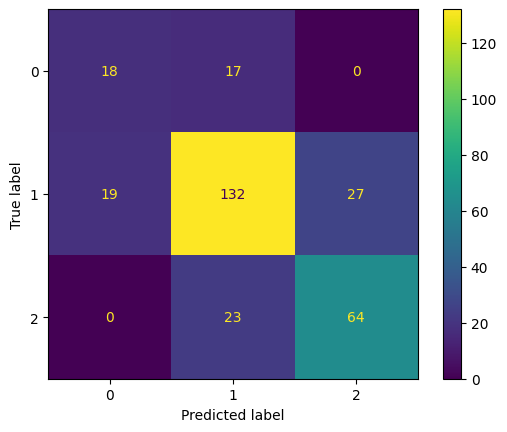

In [6]:
# k-NN	
knn = KNeighborsClassifier(n_neighbors = 5)
print('BUILD AND EVALUATE knn MODEL')
clf = KNeighborsClassifier(n_neighbors = 5)
build_and_eval_model(knn,'math score')

BUILD AND EVALUATE gau MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.745714              0.735859           0.689592       0.704961
std         0.035386              0.043199           0.032904       0.034611
min         0.692857              0.677869           0.641470       0.662366
25%         0.725000              0.703674           0.669771       0.675080
50%         0.742857              0.717778           0.677869       0.701473
75%         0.767857              0.772117           0.703201       0.722929
max         0.800000              0.806935           0.764062       0.777226
B. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.746667   0.704959 0.715304 0.708578


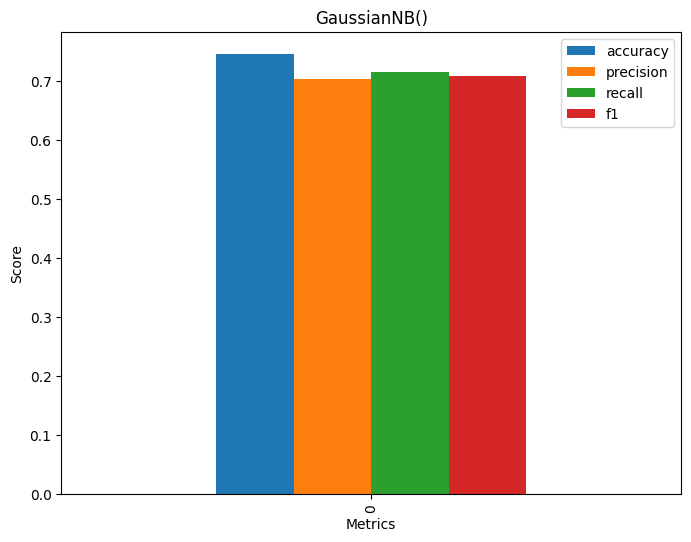

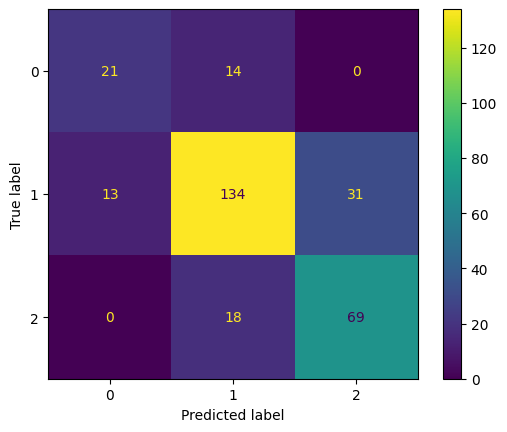

In [10]:
# Naive Bayes	
from sklearn.naive_bayes import GaussianNB
gau = GaussianNB()
print('BUILD AND EVALUATE gau MODEL')
clf = KNeighborsClassifier(n_neighbors = 5)
build_and_eval_model(gau,'math score')


BUILD AND EVALUATE randonforest MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.715238              0.696135           0.680898       0.685206
std         0.033270              0.041994           0.031238       0.032413
min         0.671429              0.635346           0.620212       0.634088
25%         0.692857              0.671246           0.659421       0.665452
50%         0.707143              0.696286           0.683484       0.681075
75%         0.728571              0.707368           0.700595       0.704305
max         0.800000              0.811111           0.735818       0.761465
B. Final Validation on Test Set
 accuracy  precision   recall       f1
     0.72   0.663823 0.709933 0.681564


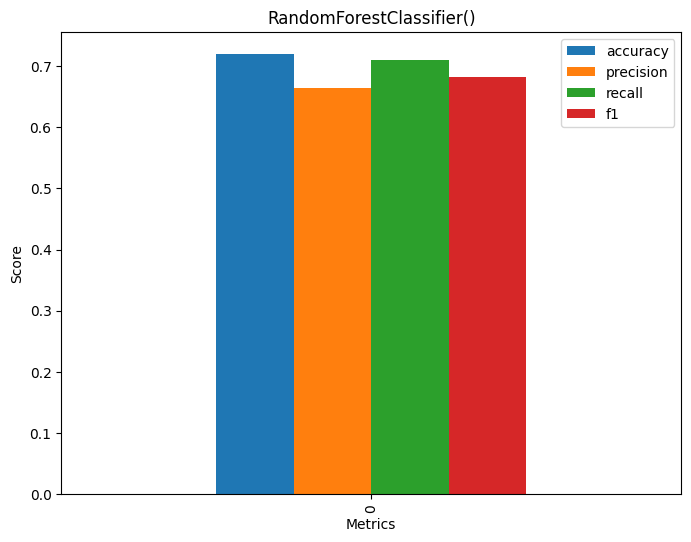

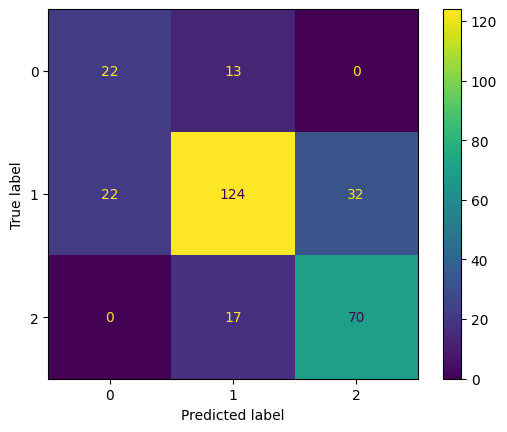

In [8]:
# Random Forest	
from sklearn.ensemble import RandomForestClassifier
randonforest =RandomForestClassifier(n_estimators=100)
print('BUILD AND EVALUATE randonforest MODEL')
clf = KNeighborsClassifier(n_neighbors = 5)
build_and_eval_model(randonforest,'math score')

BUILD AND EVALUATE tree MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.692381              0.674519           0.667667       0.666408
std         0.041163              0.053553           0.044833       0.046420
min         0.621429              0.598112           0.589565       0.584862
25%         0.667857              0.640649           0.637097       0.644420
50%         0.700000              0.683608           0.675070       0.659517
75%         0.714286              0.693913           0.697928       0.691832
max         0.778571              0.814640           0.741129       0.759299
B. Final Validation on Test Set
 accuracy  precision   recall      f1
 0.706667   0.655461 0.729129 0.67832


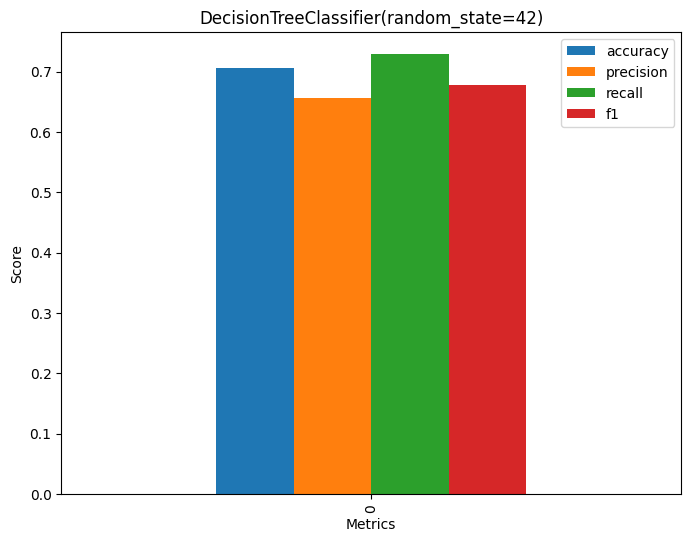

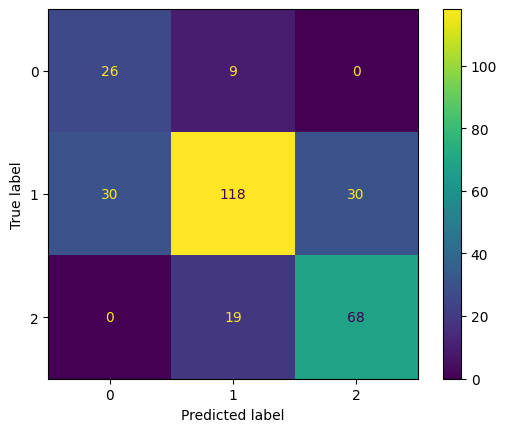

In [9]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
print('BUILD AND EVALUATE tree MODEL')
clf = KNeighborsClassifier(n_neighbors = 5)
build_and_eval_model(tree,'math score')